# Week 1: Introduction to Machine Learning for Smart Buildings

## Exercise
Using the methods introduced in the tutorial, explore the Week 1 Boston housing dataset ('wk1_boston.csv'). Identify some highly correlated features and build a multiple linear regression model:

1) Investigate what features are present and their characteristics

2) Identify and account for missing and outlier data. To do this, create a single function which identifies outliers and creates the outlier dataframe we created in the tutorial.

3) Identify the highly correlated features

4) Build and evaluate a multiple linear regression model with a subset of the available input features.

5) Build and evaluate a model which includes all of the potential input features.

## 1) Investigate what features are present and their characteristics.

In [119]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error

# Read in data
data = pd.read_csv("data/Week1_Boston_data.csv")

# read data with pandas and take a first look
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


This dataset contains information collected by the US Census service concerning housing in the area of Boston, Massachussetts. 

Features:
* CRIM -> per capita crime rate by town
* ZN -> proportion of residential land zoned for lots over 25,000 sq. ft. 
* INDUS -> proportion of residential land zoned for lots over 25,000 sq. ft.
* CHAS -> Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX -> nitric oxide concentration (parts per 10 million)
* RM -> average number of rooms per dwelling
* AGE -> proportion of owner-occupied units built prior to 1940
* DIS -> weighted distances to five Boston employment centres
* RAD -> index of accessibility to radial highways
* TAX -> full-value property-tax rate per $10,000
* PTRATIO -> pupil-teacher ratio by town
* B -> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT -> % lower status of the population
* MV -> Median value of owner-occupied homes in $1000s

For this dataset, the Median value `MV` will be our target feature (what we are trying to predict).

In [120]:
data.shape[1] # number of cols 

14

In [121]:
# Calculate Summary statistics and plot distributions
data.describe()

#data = data.drop("CHAS", axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
count,506.000000,506.000000,505.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000
mean,3.613524,11.363636,11.152079,0.069170,0.554695,6.285739,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.674198,22.532806
std,8.601545,23.322453,6.858508,0.253994,0.115878,0.702874,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.132284,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,7.010000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.380000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


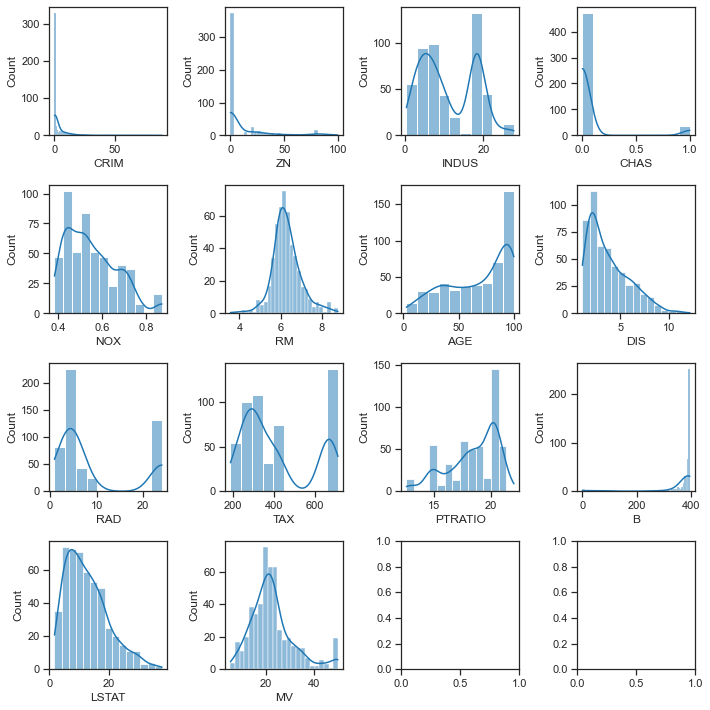

In [122]:
sns.set_style('ticks')  # set plot style
sns.set_context('notebook')    # presets for figure size

fig, axis = plt.subplots(4,4, figsize = (10,10), squeeze=False)
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axis.flat[i], kde=True) 
    #### Meanings 
    # kde = kernal density estimate - adds line
    # axis.flat[i] - makes each plot appear on its own little square 

plt.tight_layout(pad=1.01)

## 2) Identify and account for missing and outlier data. 
To do this, create a single function which identifies outliers and creates the outlier dataframe.

In [141]:
def whats_missing(df: pd.DataFrame):
    if df.isnull().values.any():
        print("This df is missing values.")
        
        # missing values for each column
        print(df.isnull().sum())
        
        # total missing values 
        print(f"Total missing values: {df.isnull().sum().sum()}")
        
    else: print("No missing values.")
    
    return None

whats_missing(data)

This df is missing values.
CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      1
MV         0
dtype: int64
Total missing values: 3


Impute Missing values

In [142]:
data = data.fillna(data.median())
whats_missing(data)

No missing values.


In [114]:
def id_outliers(df: pd.DataFrame, threshold: int = 3):
    
    # Build a new function for identifying outliers and extracting as a dataframe
    
    z_scores = stats.zscore(df)
    abs_z_score = np.abs(z_scores)
    filted = (abs_z_score > threshold).all(axis = 1)
    outliers_locs  = np.where(abs_z_score > threshold)
    
    # df with correct index and col names but no values (NaN)
    outlier_df = pd.DataFrame(index = set(outliers_locs[0]), columns = data.columns) 
    
    # adding outlier values in 
    for i, row in enumerate(outliers_locs[0]):
        col = outliers_locs[1][i]
        outlier_df.loc[row][col] = df.iloc[row][col]
        
    return outlier_df

id_outliers(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
55,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.8,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68,NaN,NaN
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.92,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.48,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN


In [115]:
# Remove identified outliers
out_ix = id_outliers(data).index
data = data.drop(out_ix)

######### HOW TO REMOVE ALL OUTLISERS EXEPT CHAS?

In [129]:
id_outliers(data)["CHAS"]
type(out_ix)

pandas.core.indexes.numeric.Int64Index

## Question

* Should you remove any of these outliers? Are there any columns you don't think should have outliers removed?

## 3) Identify the highly correlated features


In [116]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

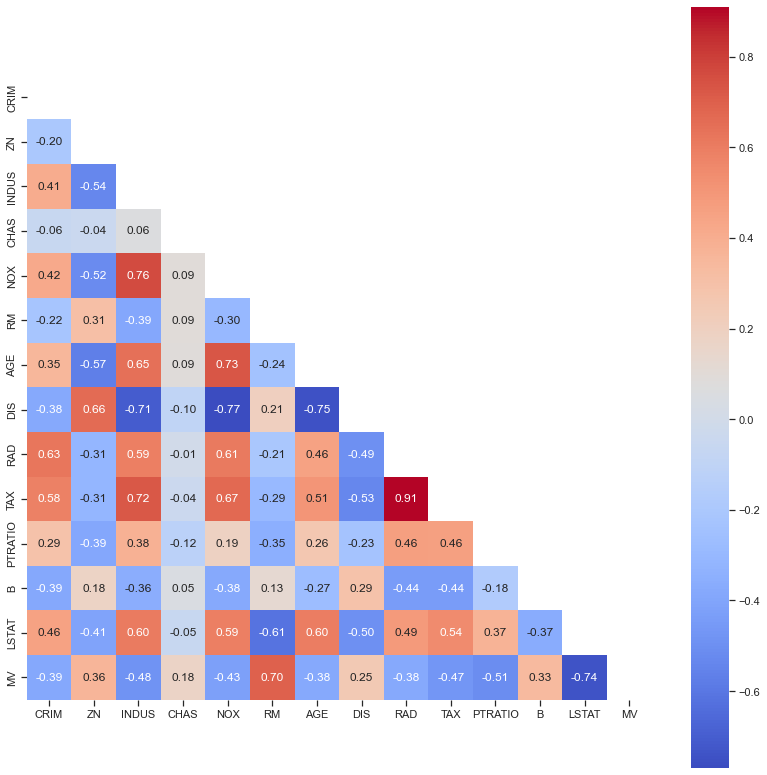

In [123]:
# Use the Seaborn heatmap
matrix = np.triu(data.corr())  # Returns a copy of an array with the elements below the k-th diagonal zeroed

fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=ax, mask = matrix)

# CHAS gone as 1 has been removed as an outlier - do not remove... 

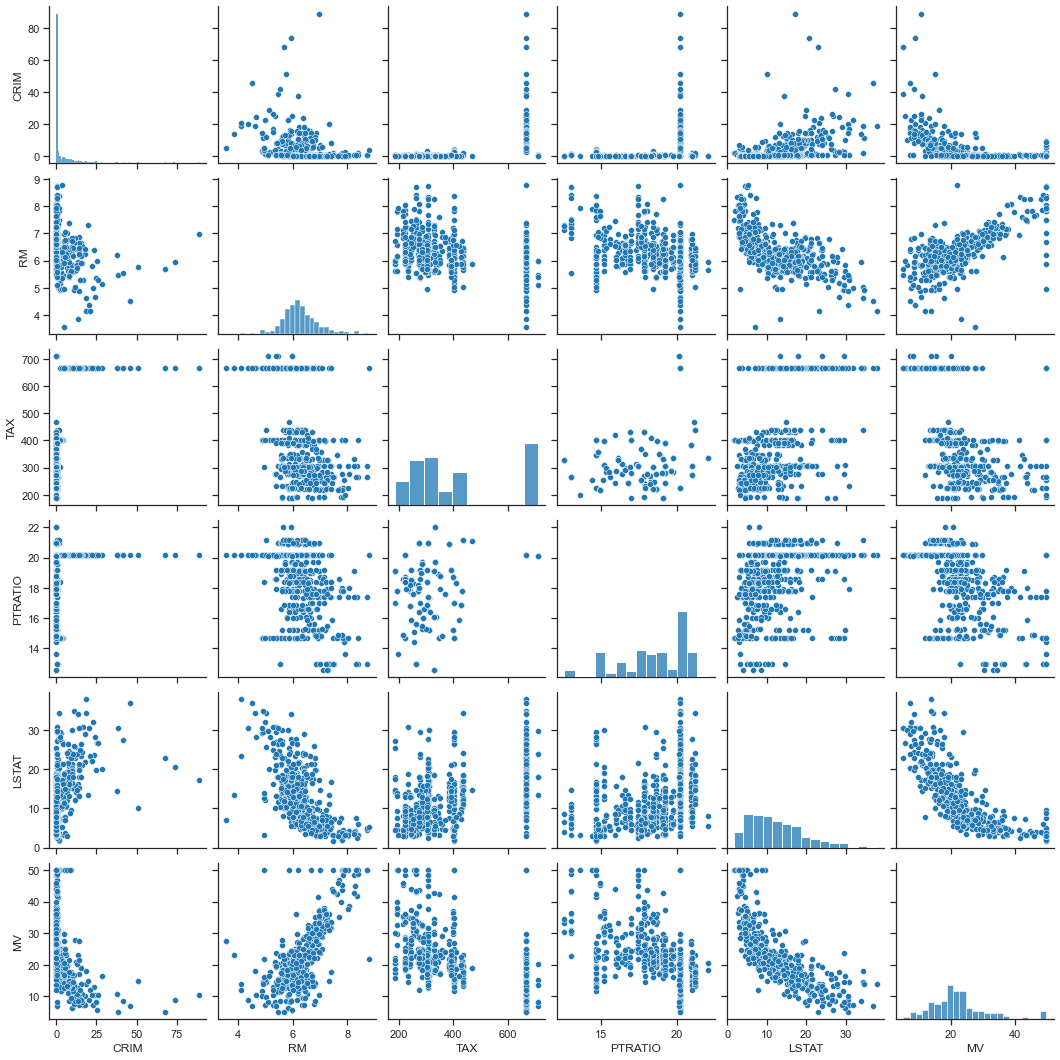

In [131]:
sns.pairplot(data[['CRIM', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MV']])

## 4) Build and evaluate a multiple linear regression model with a subset of the available input features.

In [135]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [143]:
# Step 1: Select variables to use in regression
X = data[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
X = sm.add_constant(X) # adding an itnercept

# choose the output variable
y = data[['MV']]

# Step 2: fit (train) the OLS model using statsmodels
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     262.7
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          1.76e-121
Time:                        09:55:03   Log-Likelihood:                -1554.2
No. Observations:                 506   AIC:                             3118.
Df Residuals:                     501   BIC:                             3140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3949      3.931      4.680      0.0

Text(0, 0.5, 'MV pred ($1,000)')

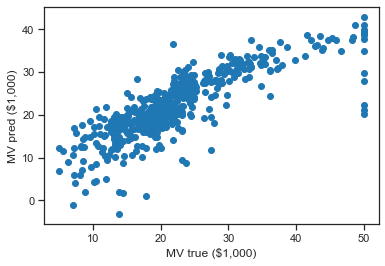

In [146]:
# Step 3: Evaluate the performance of the model

#use the model to make predictions using the inputs
prd = model.predict(X)

#plot the model predictions vs true values
ax1 = plt.scatter(y, prd)

plt.xlabel('MV true ($1,000)')
plt.ylabel('MV pred ($1,000)')

In [152]:
# Calculate RMSE and Adjusted R^2 and print

rmse = mean_squared_error(y, prd, squared=False) 
adj_r2 = model.rsquared_adj

print(f'RMSE: {rmse:.2f}')
print(f'Adjusted_R_squared: {adj_r2:.2f}')

RMSE: 5.22
Adjusted_R_squared: 0.67


## 5) Build a model which includes all of the features.

In [159]:
# Build the model and print summary
X2 = data.drop(columns = ['MV'])
X2 = sm.add_constant(X)

y2 = data[['MV']]

# fit (train) the OLS model using statsmodels
model2 = sm.OLS(y2, X2).fit()

# print the model summary
print(model2.summary())

prd2 = model2.predict(X2)

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     107.6
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          1.47e-134
Time:                        10:04:49   Log-Likelihood:                -1499.6
No. Observations:                 506   AIC:                             3027.
Df Residuals:                     492   BIC:                             3086.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2623      5.102      7.107      0.0

C:\Users\paula\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [165]:
# Calculate RMSE and R^2

rmse2 = mean_squared_error(y2, prd2, squared=False) 
adj_r2_2 = model2.rsquared_adj

print(f'RMSE: {rmse:.2f}')
print(f'Adjusted_R_squared: {adj_r2:.2f}')
print("")
print(f'RMSE 2: {rmse2:.2f}')
print(f'Adjusted_R_squared 2: {adj_r2_2:.2f}')

RMSE: 5.22
Adjusted_R_squared: 0.67

RMSE 2: 4.69
Adjusted_R_squared 2: 0.73


## *Questions*
* Does the Adjusted R^2 improve? 

-> YES

* Is this an acceptable model? Why might you not want to use this model compared to one with fewer input features? Hint: pay attention to the Warnings raised in the model summary. 

-> Note 2 states that there may be strong multicollinearity. This indicates that some of the input features are correlated with each other. We don't want to have collinearity within the input features, so we should evaluate and remove features which are highly correlated with each other. This can be done by manually looking at the correlation matrix above, or by calculating the Variance Inflation Factor (VIF) of the model.

* What other methods might you use to choose what input features to include?

-> We could calculate the VIF and remove the highest VIF features. We could also remove the features whose coefficients are not significant (p > 0.05) within the model - this is called backward stepwise feature selection when you do it one feature at a time.
